# Check Slew Rate
Oct, 3rd 2024

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [30]:
# !ls ../DATA/mount/202410/mount_pointing_20241003*
import glob

mFiles = glob.glob('../DATA/mount/202410/mount_pointing_20241003*')
mFiles

['../DATA/mount/202410/mount_pointing_20241003_95.npz',
 '../DATA/mount/202410/mount_pointing_20241003_71.npz',
 '../DATA/mount/202410/mount_pointing_20241003_143.npz',
 '../DATA/mount/202410/mount_pointing_20241003_149.npz',
 '../DATA/mount/202410/mount_pointing_20241003_59.npz',
 '../DATA/mount/202410/mount_pointing_20241003_167.npz',
 '../DATA/mount/202410/mount_pointing_20241003_5.npz',
 '../DATA/mount/202410/mount_pointing_20241003_47.npz',
 '../DATA/mount/202410/mount_pointing_20241003_119.npz',
 '../DATA/mount/202410/mount_pointing_20241003_107.npz',
 '../DATA/mount/202410/mount_pointing_20241003_41.npz',
 '../DATA/mount/202410/mount_pointing_20241003_0.npz',
 '../DATA/mount/202410/mount_pointing_20241003_131.npz',
 '../DATA/mount/202410/mount_pointing_20241003_77.npz',
 '../DATA/mount/202410/mount_pointing_20241003_35.npz',
 '../DATA/mount/202410/mount_pointing_20241003_125.npz',
 '../DATA/mount/202410/mount_pointing_20241003_113.npz',
 '../DATA/mount/202410/mount_pointing_2024

In [31]:
def get_var(variable):
    arr = []
    for mfile in mFiles:
        d = np.load(mfile)
        arr.append(d[variable])
    return np.array(arr)

In [32]:
slew_rate = get_var('slew_rate')
slew_angle = get_var('slew_angle')

## Slew Rate

In [36]:
corrections = np.median(slew_rate)/slew_rate.mean(axis=0)
print("Slew Rate corrections")
print(corrections)

Slew Rate corrections
[1.22815561 0.98431782 1.00109821 0.98817159 0.98590157]


In [34]:
print("Fractional Slew Rate Variations")
np.abs(slew_rate.std(axis=0)/np.median(slew_rate))

Fractional Slew Rate Variations


array([0.07444884, 0.05292388, 0.02852496, 0.08830207, 0.06236364])

## Mount Perfomance

Text(0.5, 1.0, 'Slew Rate Corrections')

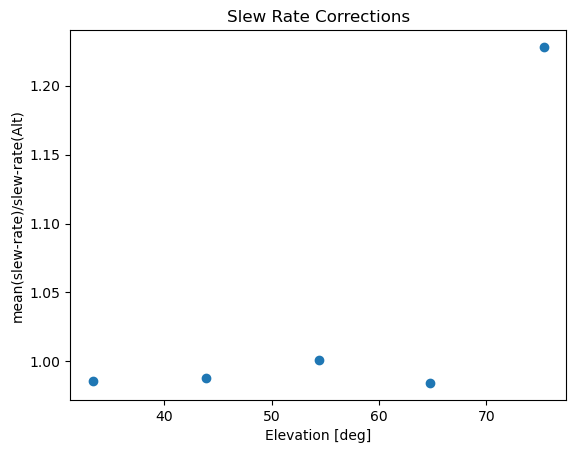

In [40]:
plt.scatter(np.mean(slew_angle, axis=0)[1:], corrections)
plt.xlabel("Elevation [deg]")
plt.ylabel("mean(slew-rate)/slew-rate(Alt)")
plt.title("Slew Rate Corrections")

In [53]:
# plt.scatter(np.diff(slew_angle, axis=0))
# plt.xlabel("Elevation [deg]")
# plt.ylabel("mean(slew-rate)/slew-rate(Alt)")
# plt.title("Slew Rate Corrections")

Text(0, 0.5, '$\\theta$ displaced')

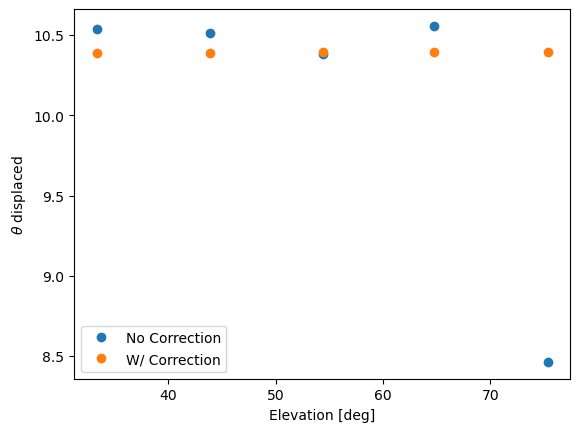

In [59]:
displacement = np.abs(np.array([np.diff(slew) for slew in slew_angle]))
plt.plot(slew_angle.mean(axis=0)[1:], displacement.mean(axis=0), 'o', label='No Correction')
plt.plot(slew_angle.mean(axis=0)[1:], displacement.mean(axis=0)*corrections, 'o', label='W/ Correction')
plt.legend()
plt.xlabel("Elevation [deg]")
plt.ylabel(r"$\theta$ displaced")

In [72]:
np.median(slew_rate)*2.456

-10.003078431992781

In [67]:
np.median(displacement*corrections)

10.348365464236819